In [13]:
from mesa_web import read_history, read_profile
import matplotlib.pyplot as plt

In [3]:
# rc params
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 6
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['lines.markeredgecolor'] = 'black'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.5

In [4]:
trimmed_history_no_mods = read_history('../Data/MESA-Web_Job_02212540964/trimmed_history.data')
trimmed_history_mods = read_history('../Data/hw6_1Msun_no_burning_mods/trimmed_history.data')

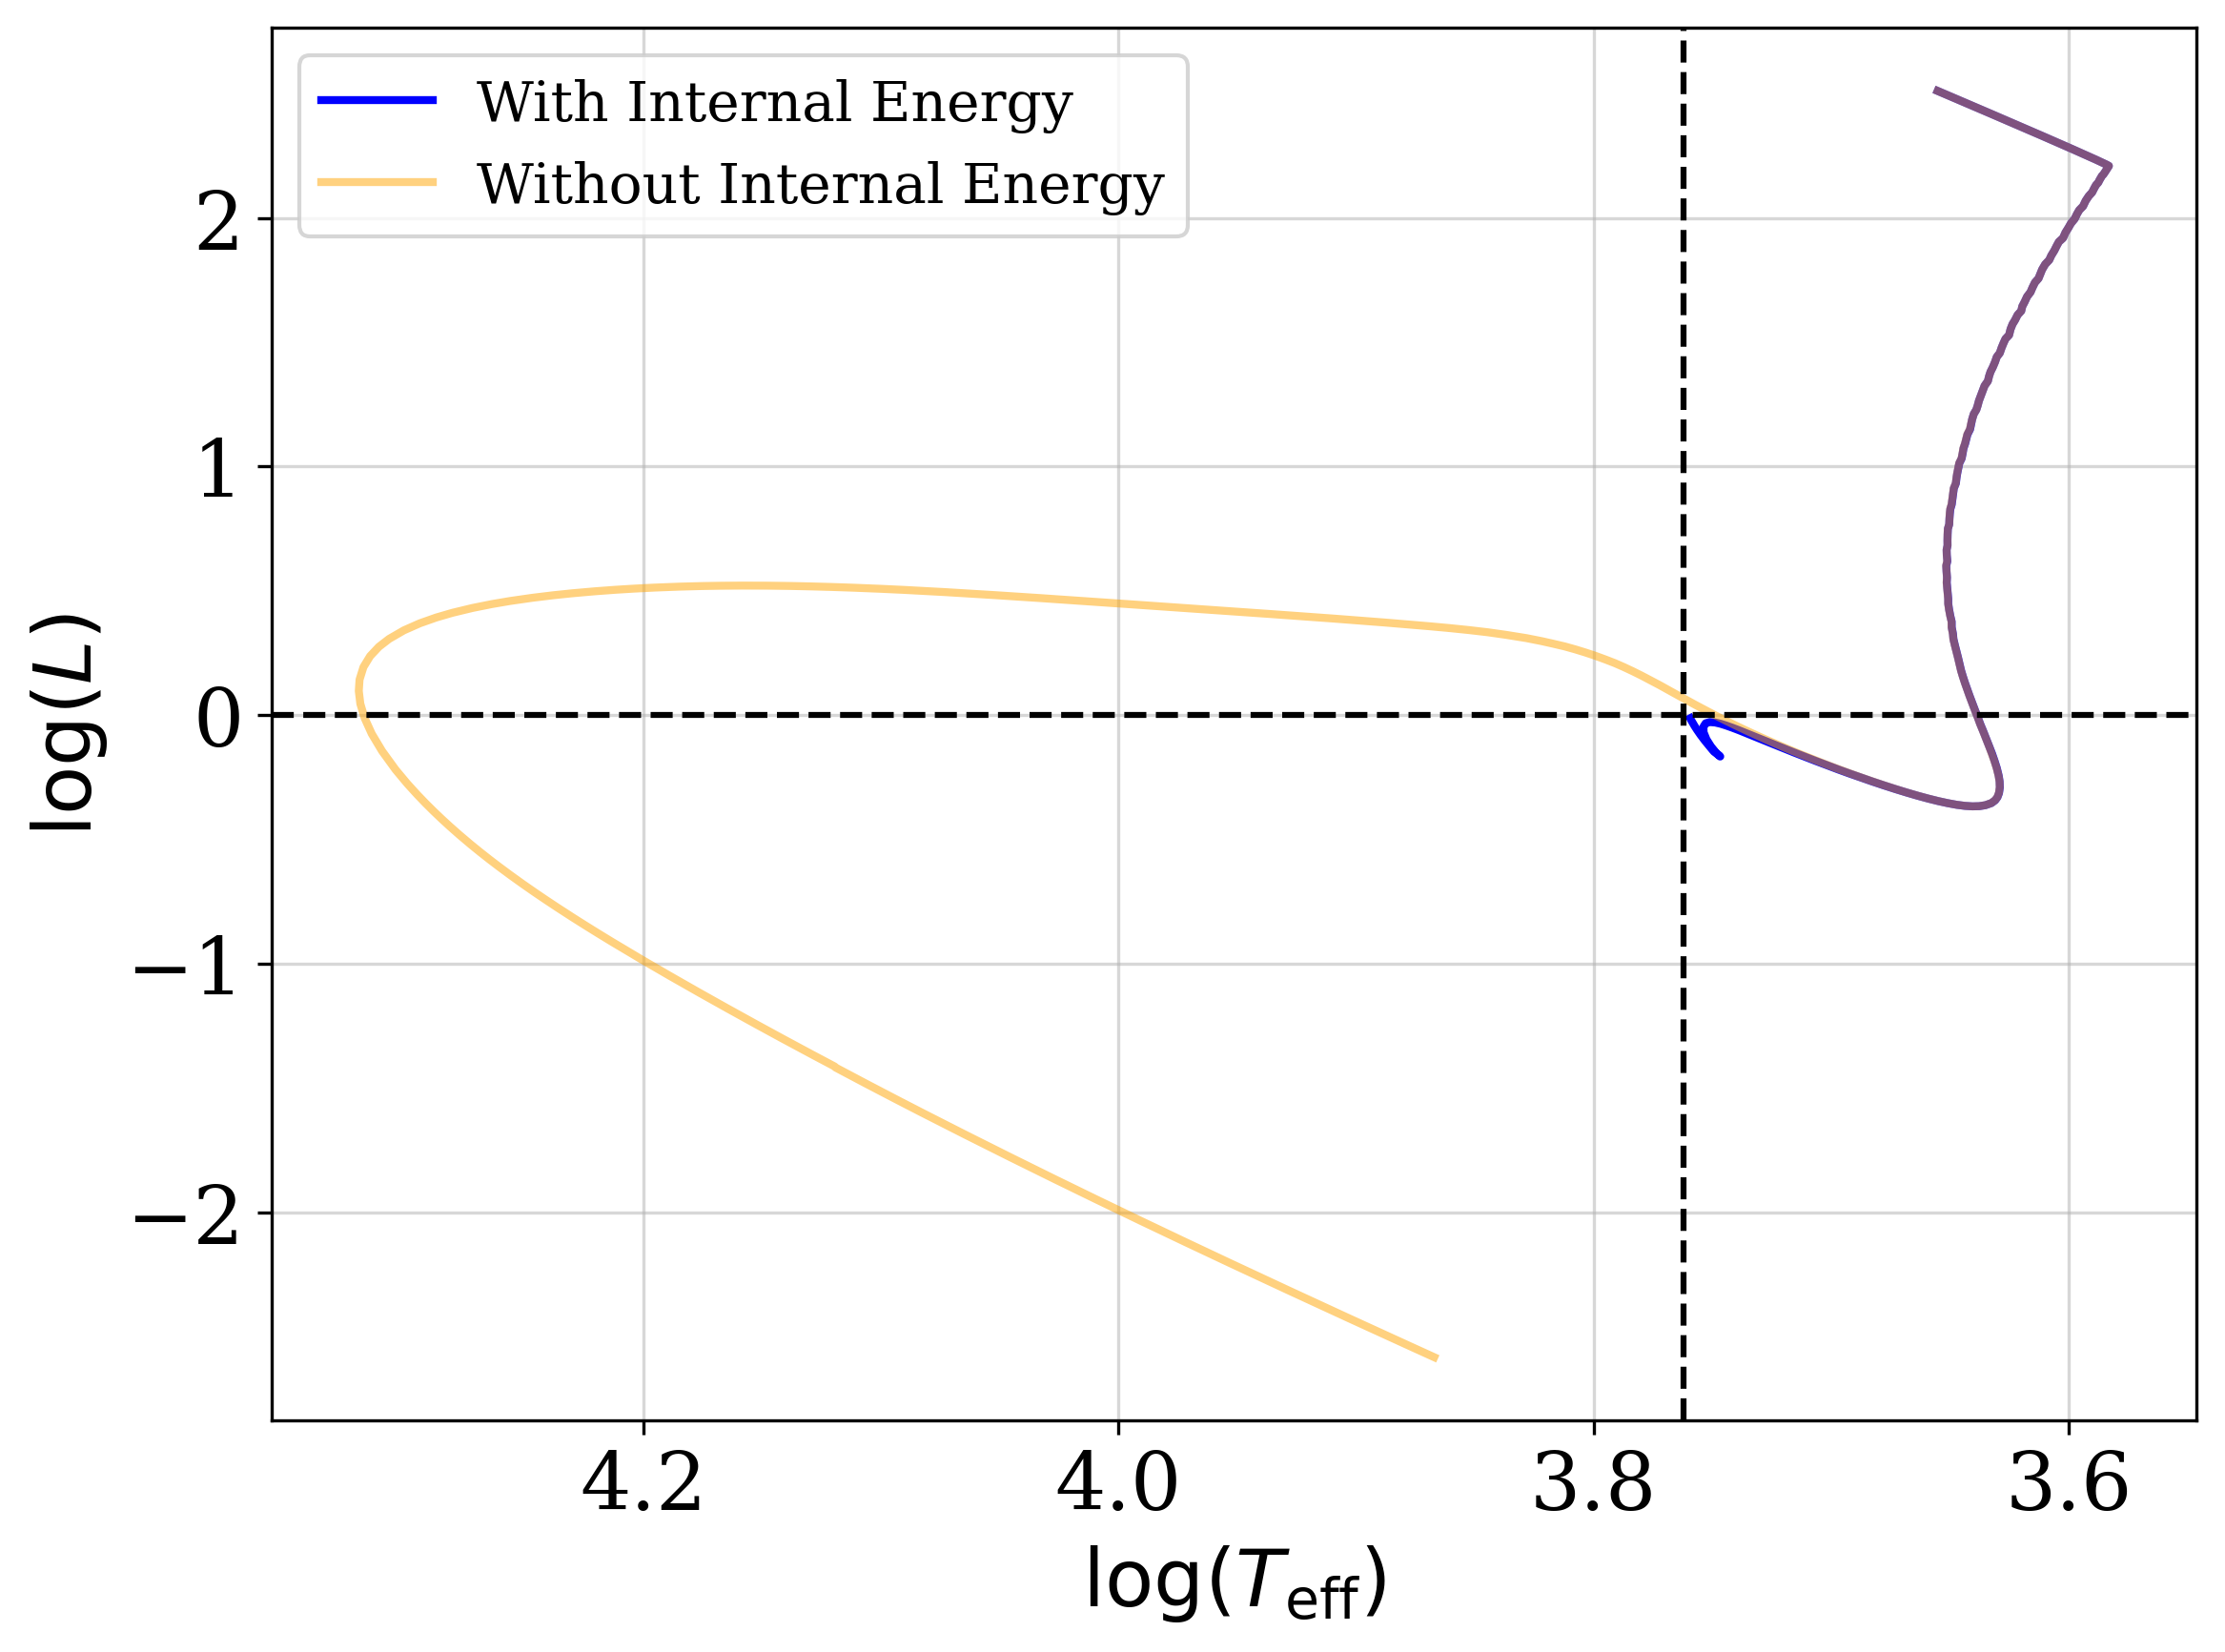

In [28]:
plt.plot(trimmed_history_no_mods['log_Teff'], trimmed_history_no_mods['log_L'], label='With Internal Energy', color='blue')
plt.plot(trimmed_history_mods['log_Teff'], trimmed_history_mods['log_L'], label='Without Internal Energy', color='orange', alpha=0.5)

# flip x axis
plt.gca().invert_xaxis()

plt.xlabel(r'$\log(T_{\mathrm{eff}})$')
plt.ylabel(r'$\log(L)$')

# vertical line at log Teff = 3.762
plt.axvline(x=3.762, color='black', linestyle='--', lw=1.5)

# horizontal line at log L = 0.0
plt.axhline(y=0.0, color='black', linestyle='--', lw=1.5)

plt.legend()
plt.tight_layout()

plt.savefig('ASTR-400A-HWs/figs/HR_diagram_int_engr.pdf', bbox_inches='tight')

In [16]:
with_int_energy = read_profile('../Data/MESA-Web_Job_02212540964/profile8.data', as_table=True)
without_int_energy = read_profile('../Data/hw6_1Msun_no_burning_mods/profile10.data', as_table=True)

In [ ]:
with_int_energy['radius'][-1], with_int_energy['luminosity'][-1], with_int_energy['logT'][-1]

(0.9958451855309022, 0.9710613370093449, 3.759769291872943)

In [ ]:
without_int_energy['radius'][-1], without_int_energy['luminosity'][-1], without_int_energy['logT'][-1]

(0.03144410379938585, 0.00261292815623438, 4.01858360998625)

In [27]:
# comparing to measured Rsun
ratio = with_int_energy['radius'][-1] / without_int_energy['radius'][-1] 
print(f'The radius of the star with internal energy is {ratio:.2f} times larger than the radius of the star without internal energy.')

The radius of the star with internal energy is 31.67 times larger than the radius of the star without internal energy.


In [ ]:
# get average density from the trimmed history
import numpy as np

average_mass = trimmed_history_mods['star_mass'].mean() # in solar masses
average_radius = (10**trimmed_history_mods['log_R']).mean() # in solar radii
average_density = average_mass / (average_radius**3 * 4/3 * np.pi)
average_density # in solar density units

0.00034957725282416823

In [25]:
# 1 Msun to 2 * 10^30 kg to 2 * 10^33 g
# 1 solar radius to 7 * 10^10 cm
average_density * (2 * 10**33) / (7 * 10**10)**3 # in g/cm^3

0.002038351328420806

In [26]:
# get average density from the trimmed history
import numpy as np

average_mass = trimmed_history_no_mods['star_mass'].mean() # in solar masses
average_radius = (10**trimmed_history_no_mods['log_R']).mean() # in solar radii
average_density = average_mass / (average_radius**3 * 4/3 * np.pi)
average_density # in solar density units

0.00013691726166824923

In [27]:
average_density * (2 * 10**33) / (7 * 10**10)**3 # in g/cm^3

0.0007983513799897914